### Assignment 9

<b>Design a face recognition system using Python.</b> \
face dataset: https://drive.google.com/drive/u/2/folders/1XGdUi0w_FcHcnlQt9mU5y_PNLyFhCW9V  \
Use of following libraries are allowed: \
∙ Numpy, Scipy for matrix multiplication , finding SVD or Eigenvector etc. \
∙ OpenCV- Python library for inputting/reading images etc. 


Take 60% data as training set and 40 % data as test set, evaluate your classifier on the following  Factors: \
a) Change the value of k and then, see how it changes the classification accuracy. \
Plot a graph between accuracy and k value to show the comparative study. \
b) Add imposters (who do not belong to the training set) into the test set and then recognize it as the not enrolled person. 



In [5]:
#Loading Required Packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

## Step 1: Reading dataset, splitting into traning(60%) and testing(40%)

In [7]:
path = "./Face Image Dataset_2020/"
directory_list = os.listdir(path)
x_train_data=[]
x_test_data =[]
y_train_label = []
y_test_label  = []
img_m,img_n=None,None
for directory in directory_list:
    files = os.listdir(path+directory)
    
    for i in range(len(files)) :
        img = cv2.imread(path+directory+"/"+files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_m,img_n = img.shape
        img = img.flatten()
        m, = img.shape
        if i<6:                              #splitting dataset
            x_train_data.append(img)
            y_train_label.append(directory)
        else:
            x_test_data.append(img)
            y_test_label.append(directory)
        

x_train = np.array(x_train_data).T
x_test = np.array(x_test_data).T

In [8]:
#function to plot image
def plotImage(x,m=112,n=92):
    plt.imshow(x.reshape(img_m,img_n))
    plt.show()

### first sample for training and testing data

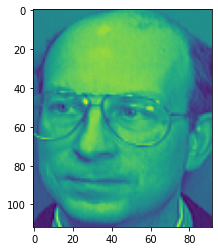

s13


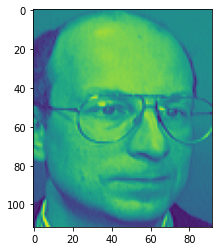

s13


In [9]:
plotImage(x_train[:,0])
print(y_train_label[0])

plotImage(x_test[:,0])
print(y_test_label[0])

# Step 2 :Mean of faces
\begin{equation}
    \mu = \frac{1}{p} \sum_{i=1}^{i=p} xi
\end{equation}

(10304,)


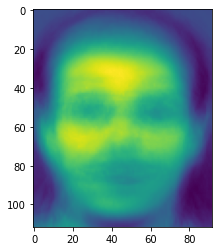

In [10]:
mean_x_train = np.mean(x_train,axis=1)
print(mean_x_train.shape)
plotImage(mean_x_train)

## Step 3 :Mean Aligned Face(first sample)
\begin{equation}
    W_{mn*i} = Xi_{mn*i}-\mu_{mn*i}
\end{equation}

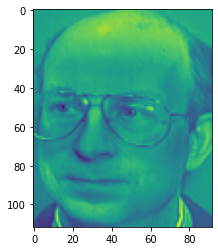

In [11]:
w = x_train-(mean_x_train.reshape(m,1))
plotImage(w[:,0])

## Step 4 :Covariance Matrix(surrogate):
\begin{equation}
    Cov-matrix = W^T_{p*mn}W_{mn*p}
\end{equation}

In [12]:
cov_matrix = np.matmul(w.T,w)            #P x P

## Step 5 :Computing Eigen Value and Eigen Vector :

In [13]:
eig_value,eig_vector = np.linalg.eig(cov_matrix)

## Step 6: Generation of feature vectors(using eigen values)

In [14]:
feature={}
for i in range(eig_value.shape[0]):
    feature[eig_value[i]]=eig_vector[:,i]
sorted_eig_value = sorted(feature.keys(),reverse=True)     #sorting according to eigen values

In [15]:
def getFeatureVector(k):                                   #generating feature vector from eigen values and eigen vectors
    p = eig_vector.shape[0]
    vec = np.ones((p,k))
    for i in range(k):
        vec[:,i:i+1] = feature[sorted_eig_value[i]].reshape(p,1)
    return vec

## Step 7: Generating Eigen Faces
\begin{equation}
    \phi_{k*mn} = \psi_{k*p}^T*W_{p*mn}
\end{equation}

In [16]:
def getEigenFace(k=5):
    f_vec = getFeatureVector(k)
    return np.matmul(f_vec.T,w.T)

### Eigen Faces :

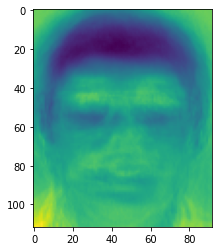

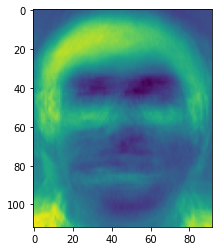

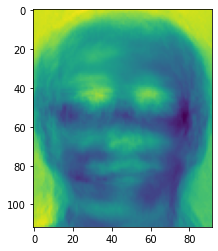

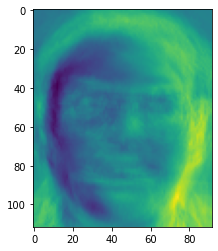

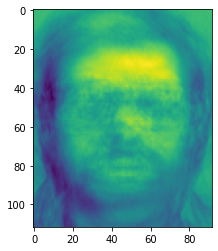

In [17]:
eig_face = getEigenFace(k=5)
for i in range(5):
    plotImage(eig_face[i])

## Step 8: Generating Signature of Each Face
\begin{equation}
    \Omega_{k*i} = \phi_{k*mn} * W_{mn*i}
\end{equation}

In [18]:
def getSignature(eig_face):
    return np.matmul(eig_face, w)

signature = getSignature(eig_face)

.

# Testing :

### Euclidean Distance :

In [326]:
def distace(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [327]:
#predict function to predict for testing image
def predict(test_image,eig_face,signature):
    test_img = test_image-mean_x_train          #mean aligning testing image
    m = test_img.shape[0]
    test_img = test_img.reshape(m,1)
    project_face = np.matmul(eig_face,test_img)  #projecting face to eigen face
    k,p = signature.shape
    dist_list = []
    for i in range(p):                            #computing distance from signature
        d = distace(signature[:,i:i+1],project_face)
        dist_list.append(d)
    min_d = min(dist_list)
    index = dist_list.index(min_d)
    return index

## Predicting for first testing sample

Predicted class -> s13
Actual class    -> s13


Testing Image ->


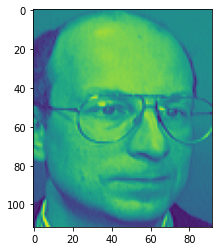



Predicted closer to ->


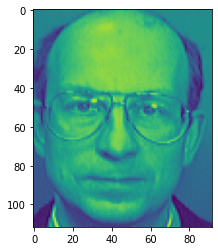

In [328]:
index = predict(x_test[:,0],eig_face,signature)
print("Predicted class ->",y_train_label[index])
print("Actual class    ->",y_test_label[0])



print("\n\nTesting Image ->")
plotImage(x_test[:,0])

print("\n\nPredicted closer to ->")
plotImage(x_train[:,index])

### Function to find Accuracy :

In [329]:
def accuracy(k):
    eig_face = getEigenFace(k)
    signature = getSignature(eig_face)
    count = 0
    m,n = x_test.shape
    for i in range(n):
        predict_index = predict(x_test[:,i],eig_face,signature)
        predict_label = y_train_label[predict_index]
        if predict_label==y_test_label[i]:
            count += 1
    
    return count*100/n

print("Accuracy for k=10  ->",accuracy(10))

Accuracy for k=10  -> 86.25


# a)K vs Accuracy :

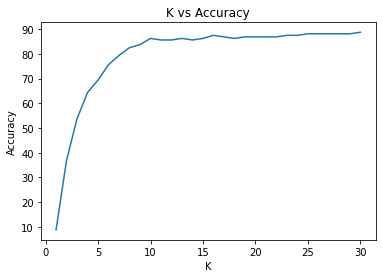

In [330]:
k_list=[]
acc_list=[]
for i in range(1,31):
    k_list.append(i)
    acc_list.append(accuracy(i))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("K vs Accuracy")
plt.plot(k_list,acc_list)
plt.show()

In [331]:
print("Accuracy for k=30  ->",accuracy(30))

Accuracy for k=30  -> 88.75


# b) Imposter

Imposter Image->


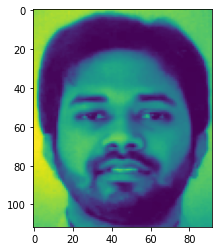

(112, 92)
(10304,)


In [332]:
imposter_img = cv2.imread("imposter.png")
imposter_img = cv2.cvtColor(imposter_img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(imposter_img, (img_n,img_m), interpolation = cv2.INTER_AREA)
print("Imposter Image->")
plt.imshow(resized_img)
plt.show()
imposter = resized_img.flatten()
print(resized_img.shape)
print(imposter.shape)

Predicted class -> s29
Actual class    -> Imposter


Testing Image ->


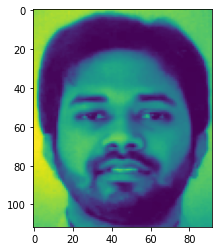



Predicted closer to ->
distance(Euclidean)     -> 79249517.69946046


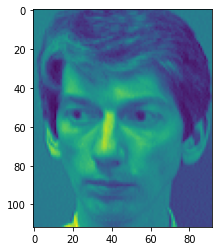

Min Distance >40000000 means image not Enrolled Person


In [334]:
k=30
eig_face = getEigenFace(k)
signature = getSignature(eig_face)

m = imposter.shape[0]
test_img = imposter-mean_x_train
test_img = test_img.reshape(m,1)
project_face = np.matmul(eig_face,test_img)
k,p = signature.shape
dist_list = []
for i in range(p):
    d = distace(signature[:,i:i+1],project_face)
    dist_list.append(d)
min_d = min(dist_list)
index = dist_list.index(min_d)

print("Predicted class ->",y_train_label[index])
print("Actual class    -> Imposter")

print("\n\nTesting Image ->")
plotImage(imposter)

print("\n\nPredicted closer to ->")
print("distance(Euclidean)     ->",min_d)
plotImage(x_train[:,index])
print("Min Distance >40000000 means image not Enrolled Person")


# Results :
<ul>
    <li>at K=10, Accuracy=86.2</li>
    <li>at K=30, Accuracy=88.2</li>
    <li>40 different classes s1 to s40 are the predicted class</li>
    <li>thresold set 40000000 to predict not Enrolled Person</li>
</ul>

.

# Analysis:

K vs Accuracy
<ul>
    <li> Accuracy increases with k</li>
    <li> Accuracy sharply increases with k between 1 to 5</li>
    <li> Accuracy changes with k is very low for k > 15 </li>
</ul>

Imposter
<ul>
    <li>Testing with imposter image, it generate class which minimum distace is very high.</li>
    <li>Usiing Thresold value (i.e :40000000) we can tell that image is not enrolled.</li>
</ul>

Precuation:
<ul>
    <li>While Testing image, test image should be mean aligned.</li>
    <li>imposter image should be resized to proper dimension</li>
</ul>